# UFC Predictor

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
pd.set_option("display.max_columns", None, "display.max_rows", None)

In [34]:
sns.set_palette('Set2')

In [29]:
url = 'mssql+pyodbc://localhost/ufc?driver=ODBC+Driver+18+for+SQL+Server&trusted_connection=yes&TrustServerCertificate=yes'

engine = create_engine(url)

query = "SELECT * FROM fight_stats"

fight_stats = pd.read_sql(query, engine)
fighter_stats = 
print("Connection Successful!")

fight_stats.head()

Connection Successful!


,blue_fighter,red_fighter,blue_fighter_kd,red_fighter_kd,blue_fighter_sig_str,red_fighter_sig_str,blue_fighter_sig_str_perc,red_fighter_sig_str_perc,blue_fighter_total_str,red_fighter_total_str,blue_fighter_td,red_fighter_td,blue_fighter_td_perc,red_fighter_td_perc,blue_fighter_sub_att,red_fighter_sub_att,blue_fighter_rev,red_fighter_rev,blue_fighter_ctrl,red_fighter_ctrl,blue_fighter_sig_str_head,red_fighter_sig_str_head,blue_fighter_sig_str_body,red_fighter_sig_str_body,blue_fighter_sig_str_leg,red_fighter_sig_str_leg,blue_fighter_sig_str_distance,red_fighter_sig_str_distance,blue_fighter_sig_str_clinch,red_fighter_sig_str_clinch,blue_fighter_sig_str_ground,red_fighter_sig_str_ground
0,Alexander Volkanovski,Diego Lopes,0,0,98 of 160,70 of 158,61%,44%,112 of 178,74 of 162,2 of 7,2 of 5,28%,40%,1,0,0,0,2:49,1:50,72 of 118,33 of 98,3 of 6,17 of 33,23 of 36,20 of 27,88 of 149,66 of 152,3 of 4,3 of 4,7 of 7,1 of 2
1,Dan Hooker,Benoit Saint Denis,0,0,30 of 47,97 of 127,63%,76%,51 of 68,170 of 205,0 of 1,2 of 9,0%,22%,2,2,0,0,0:28,6:14,19 of 32,83 of 113,8 of 12,14 of 14,3 of 3,0 of 0,28 of 44,20 of 32,2 of 3,10 of 11,0 of 0,67 of 84
2,Rafael Fiziev,Mauricio Ruffy,0,1,36 of 66,55 of 88,54%,62%,37 of 67,60 of 93,0 of 1,0 of 0,0%,---,0,0,0,0,0:00,0:45,9 of 31,45 of 77,15 of 19,4 of 4,12 of 16,6 of 7,34 of 64,42 of 66,2 of 2,1 of 2,0 of 0,12 of 20
3,Tai Tuivasa,Tallison Teixeira,0,0,42 of 58,51 of 74,72%,68%,56 of 74,117 of 144,0 of 0,3 of 9,---,33%,0,0,0,0,3:58,7:00,21 of 36,39 of 60,10 of 10,10 of 11,11 of 12,2 of 3,27 of 35,26 of 47,11 of 17,4 of 4,4 of 6,21 of 23
4,Quillan Salkilld,Jamie Mullarkey,0,0,5 of 8,1 of 4,62%,25%,18 of 21,6 of 9,2 of 3,1 of 1,66%,100%,1,0,0,0,0:39,1:14,1 of 2,1 of 4,1 of 2,0 of 0,3 of 4,0 of 0,3 of 5,0 of 3,2 of 3,1 of 1,0 of 0,0 of 0


In [16]:
fight_stats.columns

Index(['Unnamed: 0', 'blue_fighter', 'red_fighter', 'blue_fighter_kd',
       'red_fighter_kd', 'blue_fighter_sig_str', 'red_fighter_sig_str',
       'blue_fighter_sig_str_perc', 'red_fighter_sig_str_perc',
       'blue_fighter_total_str', 'red_fighter_total_str', 'blue_fighter_td',
       'red_fighter_td', 'blue_fighter_td_perc', 'red_fighter_td_perc',
       'blue_fighter_sub_att', 'red_fighter_sub_att', 'blue_fighter_rev',
       'red_fighter_rev', 'blue_fighter_ctrl', 'red_fighter_ctrl',
       'blue_fighter_sig_str_head', 'red_fighter_sig_str_head',
       'blue_fighter_sig_str_body', 'red_fighter_sig_str_body',
       'blue_fighter_sig_str_leg', 'red_fighter_sig_str_leg',
       'blue_fighter_sig_str_distance', 'red_fighter_sig_str_distance',
       'blue_fighter_sig_str_clinch', 'red_fighter_sig_str_clinch',
       'blue_fighter_sig_str_ground', 'red_fighter_sig_str_ground'],
      dtype='object')

In [30]:
def get_perc(x):
    
    y = x.split(' of ')
    
    if len(y) == 2:
        landed, total = int(y[0]), int(y[1])
    else:
        return np.nan
        
    if total > 0:
        return round(landed / total, 2)
    else:
        return 0

In [32]:
cols = ['blue_fighter_sig_str', 'red_fighter_sig_str',
        'blue_fighter_total_str', 'red_fighter_total_str',
        'blue_fighter_td', 'red_fighter_td',
        'blue_fighter_sig_str_head', 'red_fighter_sig_str_head',
        'blue_fighter_sig_str_body', 'red_fighter_sig_str_body',
        'blue_fighter_sig_str_leg', 'red_fighter_sig_str_leg',
        'blue_fighter_sig_str_distance', 'red_fighter_sig_str_distance',
        'blue_fighter_sig_str_clinch', 'red_fighter_sig_str_clinch',
        'blue_fighter_sig_str_ground', 'red_fighter_sig_str_ground']

for col in cols:
    fight_stats[col + '_perc'] = fight_stats[col].map(lambda x: get_perc(x))
    fight_stats[col + '_att'] = fight_stats[col].map(lambda x: int(x.split(' of ')[0]))

fight_stats.drop(columns=cols, inplace=True)

fight_stats.head()

,blue_fighter,red_fighter,blue_fighter_kd,red_fighter_kd,blue_fighter_sig_str_perc,red_fighter_sig_str_perc,blue_fighter_td_perc,red_fighter_td_perc,blue_fighter_sub_att,red_fighter_sub_att,blue_fighter_rev,red_fighter_rev,blue_fighter_ctrl,red_fighter_ctrl,blue_fighter_total_str_perc,red_fighter_total_str_perc,blue_fighter_sig_str_head_perc,red_fighter_sig_str_head_perc,blue_fighter_sig_str_body_perc,red_fighter_sig_str_body_perc,blue_fighter_sig_str_leg_perc,red_fighter_sig_str_leg_perc,blue_fighter_sig_str_distance_perc,red_fighter_sig_str_distance_perc,blue_fighter_sig_str_clinch_perc,red_fighter_sig_str_clinch_perc,blue_fighter_sig_str_ground_perc,red_fighter_sig_str_ground_perc,blue_fighter_sig_str_att,red_fighter_sig_str_att,blue_fighter_total_str_att,red_fighter_total_str_att,blue_fighter_td_att,red_fighter_td_att,blue_fighter_sig_str_head_att,red_fighter_sig_str_head_att,blue_fighter_sig_str_body_att,red_fighter_sig_str_body_att,blue_fighter_sig_str_leg_att,red_fighter_sig_str_leg_att,blue_fighter_sig_str_distance_att,red_fighter_sig_str_distance_att,blue_fighter_sig_str_clinch_att,red_fighter_sig_str_clinch_att,blue_fighter_sig_str_ground_att,red_fighter_sig_str_ground_att
0,Alexander Volkanovski,Diego Lopes,0,0,0.61,0.44,0.29,0.40,1,0,0,0,2:49,1:50,0.63,0.46,0.61,0.34,0.50,0.52,0.64,0.74,0.59,0.43,0.75,0.75,1.00,0.50,98,70,112,74,2,2,72,33,3,17,23,20,88,66,3,3,7,1
1,Dan Hooker,Benoit Saint Denis,0,0,0.64,0.76,0.00,0.22,2,2,0,0,0:28,6:14,0.75,0.83,0.59,0.73,0.67,1.00,1.00,0.00,0.64,0.62,0.67,0.91,0.00,0.80,30,97,51,170,0,2,19,83,8,14,3,0,28,20,2,10,0,67
2,Rafael Fiziev,Mauricio Ruffy,0,1,0.55,0.62,0.00,0.00,0,0,0,0,0:00,0:45,0.55,0.65,0.29,0.58,0.79,1.00,0.75,0.86,0.53,0.64,1.00,0.50,0.00,0.60,36,55,37,60,0,0,9,45,15,4,12,6,34,42,2,1,0,12
3,Tai Tuivasa,Tallison Teixeira,0,0,0.72,0.69,0.00,0.33,0,0,0,0,3:58,7:00,0.76,0.81,0.58,0.65,1.00,0.91,0.92,0.67,0.77,0.55,0.65,1.00,0.67,0.91,42,51,56,117,0,3,21,39,10,10,11,2,27,26,11,4,4,21
4,Quillan Salkilld,Jamie Mullarkey,0,0,0.62,0.25,0.67,1.00,1,0,0,0,0:39,1:14,0.86,0.67,0.50,0.25,0.50,0.00,0.75,0.00,0.60,0.00,0.67,1.00,0.00,0.00,5,1,18,6,2,1,1,1,1,0,3,0,3,0,2,1,0,0


## Exploratory Data Analysis (EDA)

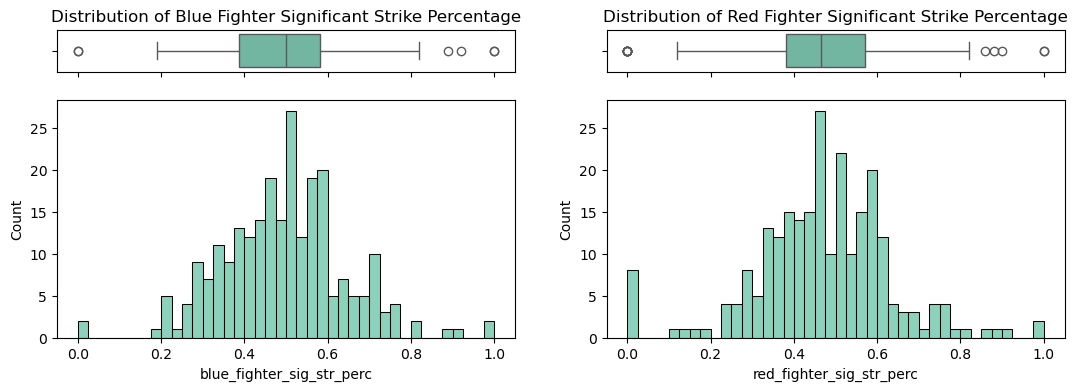

In [68]:
fig, ((bp1, bp2), (hist1, hist2)) = plt.subplots(2, 2, sharex=True, figsize=(13, 4), gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(fight_stats.blue_fighter_sig_str_perc, orient='h', ax=bp1)
sns.histplot(data=fight_stats, x='blue_fighter_sig_str_perc', bins=40, ax=hist1)
bp1.set_title('Distribution of Blue Fighter Significant Strike Percentage')

sns.boxplot(fight_stats.red_fighter_sig_str_perc, orient='h', ax=bp2)
sns.histplot(data=fight_stats, x='red_fighter_sig_str_perc', bins=40, ax=hist2)
bp2.set_title('Distribution of Red Fighter Significant Strike Percentage');